In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [37]:
data = pd.read_csv('measurements/measurements.csv', delimiter='\s+')  # load measurements
measurex = data['X'].values  # position X
measurey = data['Y'].values  # position Y
measurel = data['label'].values - 1 # Character of seabed

In [38]:
data = pd.read_csv('measurements/x.csv')  # x positions
x = data['X'].values
data = pd.read_csv('measurements/y.csv')  # y positions
y = data['Y'].values

In [39]:
seamap = np.loadtxt('measurements/seamap.csv', dtype=int)  # seamap values

In [40]:
xx, yy = np.meshgrid(x, y)  # combining x and y into 2, 2D arrays

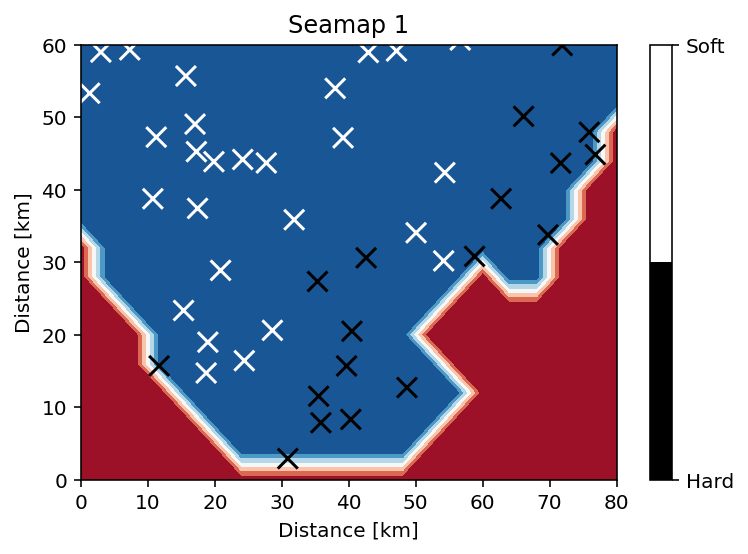

In [50]:
# Create figure window 1
cmap = ListedColormap(['black', 'white'])  # custom colourmap
plt.figure(1, dpi=144)
plt.contourf(x, y, seamap, cmap='RdBu')  # plotting cmap as contours
plt.xlim([0, 80])
plt.ylim([0, 60])
plt.scatter(measurex, measurey, c=measurel, marker='x', s=100, cmap=cmap)  # measurements
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Hard', 'Soft'])
plt.title('Seamap 1')
plt.xlabel('Distance [km]')
plt.ylabel('Distance [km]')
plt.show()

In [29]:
# selecting only where the measurements are sea not shore
xtest = xx.flatten()
ytest = yy.flatten()
stest = seamap.flatten()
indi = np.equal(stest, 1)
xtest = xtest[indi] 
ytest = ytest[indi]

In [30]:
# train using measured values
measurep = list(zip(measurex, measurey))
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(measurep, measurel)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# apply to test positions
testlocations = np.vstack((xtest, ytest)).T
sbed = knn.predict(testlocations)

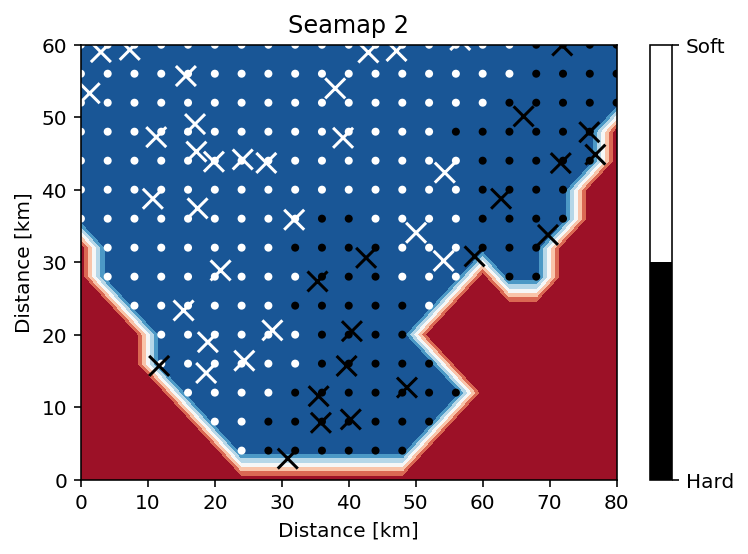

In [51]:
# Create figure 2
plt.figure(2, dpi=144)
# plot map
plt.contourf(x, y, seamap, cmap='RdBu')  # plotting seamap as contours
plt.xlim([0, 80])
plt.ylim([0, 60])
plt.scatter(xtest, ytest, c=sbed, cmap=cmap, marker='.')  # k means
plt.scatter(measurex, measurey, c=measurel, marker='x', s=100, cmap=cmap)  # measurement
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Hard', 'Soft'])
plt.title('Seamap 2')
plt.xlabel('Distance [km]')
plt.ylabel('Distance [km]')
plt.show()